In [74]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import os
import matplotlib.pyplot as plt

This part of the code is for processing ntuples into pandas data frames with a list of branches and batch size, specifically below is the Monte Carlo simulation for $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\lambda_c^{+}\rightarrow p k^{-} \pi^{+}$

In [151]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
files

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root',
 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']

In [152]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuple):
    file = uproot.open(dir_path + "/" + ntuple)
    tree = file["CharmAnalysis;1"]
    return tree

#takes event #, list of branches, and batch size: returns tuple of branches with data
def show(event, TTree, branches, batch_size):
    #if we want the entire data set set batch size = 0
    if batch_size == 0:
        batch_size = TTree.num_entries

    #iterates through TTree as generator functiona and yields batches of data
    current_event = 0
    for array in TTree.iterate(branches, step_size = batch_size, library = "pd"):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays

In [153]:
TTree = process_ntuple(files[0])
TTree.name

'CharmAnalysis'

In [154]:
df = show(0, TTree, ["DMesons_pt", "DMesons_m", "DMesons_eta", "DMesons_phi"], 1000)

#drop empty rows
empty_indices = [i for i, x in enumerate(df['DMesons_pt']) if len(x) == 0]
df = df.drop(empty_indices)
df = df.reset_index(drop=True)
df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[5735.74853515625, 5735.74853515625]","[1860.0809326171875, 2207.808349609375]","[0.9682132005691528, 0.9682132005691528]","[1.2285282611846924, 1.2285282611846924]"
1,[10047.125],[1862.4176025390625],[0.08182407170534134],[2.709681510925293]
2,"[18993.7421875, 18993.7421875]","[1853.90625, 2398.886962890625]","[-1.6619627475738525, -1.6619627475738525]","[-0.46051180362701416, -0.46051180362701416]"
3,"[10118.494140625, 10118.494140625]","[1874.203125, 2468.1806640625]","[0.041659336537122726, 0.041659336537122726]","[0.780849277973175, 0.780849277973175]"
4,"[12579.470703125, 12579.470703125]","[1884.987060546875, 2220.384521484375]","[-1.1025604009628296, -1.1025604009628296]","[0.7788794040679932, 0.7788794040679932]"
...,...,...,...,...
556,"[5451.50732421875, 5451.50732421875]","[1849.396240234375, 2459.749755859375]","[-0.064152292907238, -0.064152292907238]","[2.395824909210205, 2.395824909210205]"
557,"[30662.75, 30662.75, 30662.75]","[1872.678955078125, 2392.157470703125, 2270.92...","[1.7234350442886353, 1.7234350442886353, 1.723...","[-0.5089108347892761, -0.5089108347892761, -0...."
558,"[11592.576171875, 11592.576171875]","[1850.5804443359375, 2294.733642578125]","[-0.22858543694019318, -0.22858543694019318]","[0.2433209866285324, 0.2433209866285324]"
559,[9751.6259765625],[2263.62890625],[-0.15377356112003326],[-1.8734217882156372]


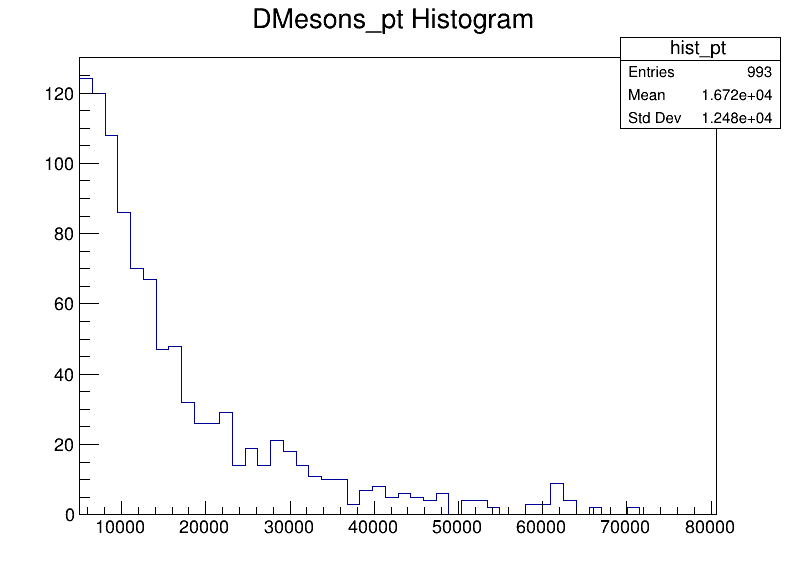

In [123]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

nbins = 50
xmin = np.min(df["DMesons_pt"])
xmax = np.max(df["DMesons_pt"])

hist = ROOT.TH1F("hist_pt", "DMesons_pt Histogram", nbins, xmin, xmax)

for i in range(len(df["DMesons_pt"])):
    pt = df["DMesons_pt"][i]
    for val in pt:
        hist.Fill(val)

# Draw the histogram
c = ROOT.TCanvas("c", "c", 800, 600)
hist.Draw()
c.Draw()

In [179]:
TTree2 = process_ntuple(files[0])

df2 = show(0, TTree2, ['TruthParticles_Selected_daughterInfoT__pt', 'TruthParticles_Selected_daughterInfoT__phi','TruthParticles_Selected_daughterInfoT__eta', 'TruthParticles_Selected_daughterInfoT__pdgId'], 10000)
empty_indices2 = [i for i, x in enumerate(df2['TruthParticles_Selected_daughterInfoT__pt']) if len(x) == 0]
df2 = df2.drop(empty_indices2)
df2 = df2.reset_index(drop=True)
df2

,TruthParticles_Selected_daughterInfoT__pt,TruthParticles_Selected_daughterInfoT__phi,TruthParticles_Selected_daughterInfoT__eta,TruthParticles_Selected_daughterInfoT__pdgId
0,"((1123.1682, 3878.585, 958.6866))","((1.2170534, 1.3581188, 0.70865583))","((1.0610737, 0.8769237, 1.0839401))","((-321, 211, 211))"
1,"((6099.8413, 1293.4324, 2749.1514))","((2.6134217, 2.7200499, 2.921711))","((0.16281185, 0.01096963, -0.0618442))","((-321, 211, 211))"
2,"((6289.112, 6667.3516, 6242.084, 28.585157))","((-0.37195462, -0.4972521, -0.5173161, -0.4602...","((-1.6081908, -1.7318903, -1.6300088, -1.675798))","((-321, 211, 211, 22))"
3,"((9216.71, 35438.234, 17588.225))","((1.943759, 1.9455862, 1.9117515))","((1.9568142, 1.9821448, 1.9503908))","((-321, 211, 211))"
4,"((2002.057, 217.7519, 3713.5286))","((-2.5672243, -2.1763499, -2.424952))","((-1.141573, -2.3164506, -1.0353537))","((-321, 211, 211))"
...,...,...,...,...
9995,"((2151.0593, 1245.3898, 2046.0638))","((-2.5996447, -2.952008, -2.2018938))","((0.20800702, 0.43235645, 0.42277658))","((-321, 211, 211))"
9996,"((2736.7104, 1384.2468, 1293.7802))","((3.1202385, 2.5702753, -3.0097811))","((0.06700771, 0.12232215, -0.2964751))","((-321, 211, 211))"
9997,"((2112.475, 251.03328, 5257.3037))","((0.42087388, 0.8593871, 0.20681547))","((1.6961367, 1.1129706, 1.5997151))","((-321, 211, 211))"
9998,"((821.93463, 4196.02, 163.92838))","((-0.80155736, -0.6736053, -1.2575617))","((1.2259598, 1.0538431, 0.102970615))","((-321, 211, 211))"


This section is for ROOT plotting and analysis

Creating Dalitz plot for Monte Carlo $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\lambda_c^{+}\rightarrow p k^{-} \pi^{+}$, Using TLorentzVectors does it agree with CLEO (https://arxiv.org/pdf/0707.3060.pdf)>

In [180]:
k_mass = 0.493677 
pi_mass = 0.13957061 

TLorentzVectorList = []
for index, row in df2.iterrows():
    pts = row['TruthParticles_Selected_daughterInfoT__pt'][0]
    etas = row['TruthParticles_Selected_daughterInfoT__eta'][0]
    phis = row['TruthParticles_Selected_daughterInfoT__phi'][0]
    pdgids = row['TruthParticles_Selected_daughterInfoT__pdgId'][0]

    for pt, eta, phi, pdgid in zip(pts, etas, phis, pdgids):
        if pdgid == 211:
            m = pi_mass
        elif pdgid == -321:
            m = k_mass
        else:
            #print("Skipping {}".format(index))
            continue

        p = ROOT.TLorentzVector()
        p.SetPtEtaPhiM(pt, eta, phi, m)
        TLorentzVectorList.append(p)
    #print(f"Event {index}: {len(TLorentzVectorList)} particles")
    #print(len(TLorentzVectorList))

In [181]:
inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

bins = np.linspace(0, 1.5, 100)
hist, x_edges, y_edges = np.histogram2d([], [], bins=[bins, bins])

reshaped_list = [TLorentzVectorList[i:i+3] for i in range(0, len(TLorentzVectorList), 3)]
np.shape(reshaped_list)

(10000, 3)

In [182]:
kpi_low = []
kpi_high = []

for sublist in reshaped_list:
    kpi_one = inv_mass_squared(sublist[0], sublist[1])
    kpi_two = inv_mass_squared(sublist[0], sublist[2])
    if kpi_one > kpi_two:
        kpi_high.append(kpi_one)
        kpi_low.append(kpi_two)
    else:
        #kpi_one < kpi_kpi_two:
        kpi_high.append(kpi_two)
        kpi_low.append(kpi_one)

In [183]:
def scatter_plot(x, y, title):
    plt.scatter(x, y, s = .5)
    plt.title(title)
    plt.xlabel(r'$m^2(K^+\pi^-)$ high')
    plt.ylabel(r'$m^2(K^+\pi^-$) low')
    plt.show()

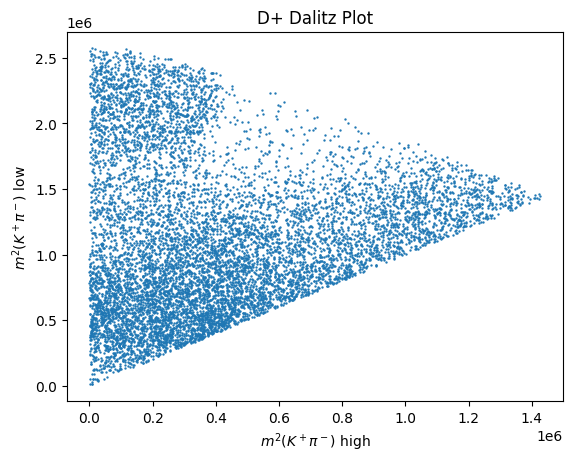

In [184]:
scatter_plot(kpi_low, kpi_high, "D+ Dalitz Plot")
# plt.scatter(kpi_low, kpi_high, s = .5)
# plt.title("D+ Dalitz Plot")
# plt.xlabel(r'$m^2(K^+\pi^-)$ high')
# plt.ylabel(r'$m^2(K^+\pi^-$) low')
# plt.show()

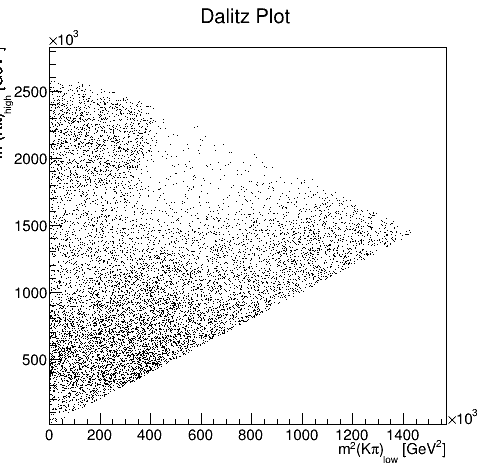

In [130]:
canvas = ROOT.TCanvas("canvas", "Dalitz Plot", 500, 500)

# create a TGraph object with the data
graph = ROOT.TGraph(len(kpi_low), np.array(kpi_low), np.array(kpi_high))
graph.SetTitle("Dalitz Plot; m^{2}(K#pi)_{low} [GeV^{2}]; m^{2}(K#pi)_{high} [GeV^{2}]")
graph.SetMarkerStyle(1)
graph.SetMarkerSize(0.5)

# draw the graph on the canvas
graph.Draw("AP")

# save the plot as a PNG image
# canvas.SaveAs("DalitzPlot.png")

canvas.Draw()

Lambda Analysis Starts Here ----------------------------------------------------------

In [192]:
TTree3 = process_ntuple(files[1])

lambda_tdf = show(0, TTree3, ['TruthParticles_Selected_daughterInfoT__pt', 'TruthParticles_Selected_daughterInfoT__phi','TruthParticles_Selected_daughterInfoT__eta', 'TruthParticles_Selected_daughterInfoT__pdgId'], 10000)
empty_indices3 = [i for i, x in enumerate(lambda_tdf['TruthParticles_Selected_daughterInfoT__pt']) if len(x) == 0]
lambda_tdf = lambda_tdf.drop(empty_indices3)
lambda_tdf = lambda_tdf.reset_index(drop=True)
lambda_tdf

,TruthParticles_Selected_daughterInfoT__pt,TruthParticles_Selected_daughterInfoT__phi,TruthParticles_Selected_daughterInfoT__eta,TruthParticles_Selected_daughterInfoT__pdgId
0,"((6130.84, 3433.7043, 6124.614))","((-2.106452, -2.2067764, -2.202212))","((-2.0240848, -2.0725062, -1.8902587))","((2212, -321, 211))"
1,"((3856.1272, 266.34576, 3640.6067))","((2.2966359, 2.0602465, 1.9333525))","((-0.3594819, 0.124157935, -0.2871962))","((2212, 211, -321))"
2,"((2729.074, 4162.5327, 529.9963))","((2.7226782, 2.510235, 2.51115))","((-0.1434682, 0.19480081, 0.26785102))","((2212, -321, 211))"
3,"((61983.75, 28005.066, 10250.234))","((-2.6987386, -2.6988401, -2.6461754))","((-0.29596475, -0.28630117, -0.28976095))","((2212, -321, 211))"
4,"((7744.3213, 2398.754, 841.6758))","((0.18166617, 0.054863453, 0.004921999))","((-0.20847009, -0.22605774, -0.47194183))","((2212, 211, -321))"
...,...,...,...,...
9995,"((2532.3123, 917.21686, 2037.6659))","((-2.5774815, -2.6905293, -2.4432852))","((1.0106094, 0.86975276, 0.4058634))","((2212, 211, -321))"
9996,"((5439.382, 2846.9988, 3596.5889))","((1.097283, 1.2157772, 1.3903624))","((-2.1886082, -2.152903, -2.1724207))","((2212, -321, 211))"
9997,"((5440.4897, 1408.1399, 1091.196))","((-1.9652525, -1.9222608, -2.3743248))","((-0.26092234, -0.25988173, -0.64190143))","((2212, -321, 211))"
9998,"((7528.885, 3180.4785, 4519.698))","((2.6085212, 2.565044, 2.5214121))","((-1.751375, -1.6975358, -1.9437438))","((2212, 211, -321))"


In [193]:
p_mass = 0.938 #Gev/c^2

TLorentzVectorList2 = []
for index, row in lambda_tdf.iterrows():
    pts = row['TruthParticles_Selected_daughterInfoT__pt'][0]
    etas = row['TruthParticles_Selected_daughterInfoT__eta'][0]
    phis = row['TruthParticles_Selected_daughterInfoT__phi'][0]
    pdgids = row['TruthParticles_Selected_daughterInfoT__pdgId'][0]

    for pt, eta, phi, pdgid in zip(pts, etas, phis, pdgids):
        if pdgid == 211:
            m = pi_mass
        elif pdgid == -321:
            m = k_mass
        elif pdgid == 2212:
            m = p_mass
        else:
            #print("Skipping {}".format(index))
            continue

        p = ROOT.TLorentzVector()
        p.SetPtEtaPhiM(pt, eta, phi, m)
        TLorentzVectorList2.append(p)

In [194]:
reshaped_list2 = [TLorentzVectorList2[i:i+3] for i in range(0, len(TLorentzVectorList2), 3)]
np.shape(reshaped_list2)
len(TLorentzVectorList2)

30000

In [196]:
pk_list = []
kpi_list = []

for sublist in reshaped_list2:
    pk = inv_mass_squared(sublist[0], sublist[1])
    kpi = inv_mass_squared(sublist[1], sublist[2])
    if pk > kpi:
        pk_list.append(pk)
        kpi_list.append(kpi)
    else:
        pk_list.append(kpi)
        kpi_list.append(pk)

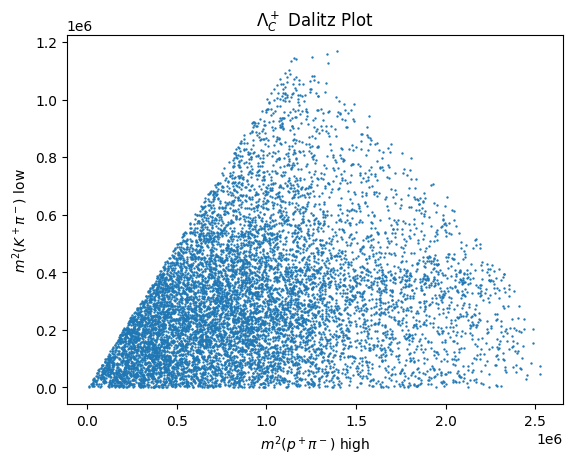

In [202]:
plt.scatter(pk_list, kpi_list, s = .5)
plt.title("$\Lambda_C^+$ Dalitz Plot")
plt.xlabel(r'$m^2(p^+\pi^-)$ high')
plt.ylabel(r'$m^2(K^+\pi^-$) low')
plt.show()